In [2]:
import pandas as pd
import numpy as np


In [3]:
import os
print(os.getcwd())


/Users/andrii/Documents/londons_fashionable_finds/03_Feature_Engineering


In [4]:
os.chdir('/Users/andrii/Documents/londons_fashionable_finds')


In [5]:
shops = pd.read_csv('02_Data_preprocessing/merged_shops_data.csv')

In [6]:
from IPython.display import display

display(shops)

,name,address,latitude,longitude,rating,reviews_count,place_id,price_level,types,borough,Code,Value,Code_earnings,Pay_2021,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived)
0,CIRCA VINTAGE,"87a Lansdowne Way, London",51.474835,-0.128693,4.7,9,ChIJmdDiKHUPdkgR9QrMOgW2vjc,NaN,"jewelry_store, home_goods_store, clothing_stor...",Lambeth,E09000022,"510,000",00AY,673.6,11294.589888,11605.471910
1,Retromania Fara London,"6 Upper Tachbrook St, London",51.493377,-0.139957,4.3,76,ChIJTzZgDuAEdkgR7NUgOuToH4k,NaN,"clothing_store, store, point_of_interest, esta...",Westminster,E09000033,"1,070,000",00BK,771.6,16194.968750,16175.703125
2,Leona,"Brixton Village, Unit 5 Coldharbour Ln, London",51.462156,-0.111480,5.0,4,ChIJ5x9QqWgEdkgRQM3g8mE6ay8,NaN,"clothing_store, store, point_of_interest, esta...",Lambeth,E09000022,"510,000",00AY,673.6,11294.589888,11605.471910
3,ReBelished,"36 Hammersmith Grove, London",51.495415,-0.226249,0.0,0,ChIJ79eAhtQPdkgRO5DhIpyyhhM,NaN,"clothing_store, store, point_of_interest, esta...",Hammersmith and Fulham,E09000013,"740,000",00AN,714.5,14202.601770,13752.920354
4,Chelsea Vintage Couture,"Office - Showroom, BY APPOINTMENT ONLY, Sloane...",51.492457,-0.165966,4.7,45,ChIJhe7IZxoFdkgRb3pI8hrLrlw,NaN,"clothing_store, store, point_of_interest, esta...",Kensington and Chelsea,E09000020,"1,200,000",00AW,767.0,15419.339806,18563.563107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Haven House Children's Hospice Shop: Leytonstone,"849 High Road, London",51.569737,0.012280,4.8,22,ChIJ4fSpmm-n2EcR22L0FEDSTYk,NaN,"store, point_of_interest, establishment",Waltham Forest,E09000031,"430,000",00BH,624.7,11735.375000,11745.701389
459,Sue Ryder,"93-95 High St, London",51.582491,-0.029880,4.3,29,ChIJ3XURusYddkgR-kfvsia9vJY,1.0,"point_of_interest, store, establishment",Waltham Forest,E09000031,"430,000",00BH,624.7,11735.375000,11745.701389
460,Cancer Research UK,"13 The Broadway, London",51.578813,-0.123953,4.7,7,ChIJ8abYTccbdkgRuWlgpSbn4h8,NaN,"clothing_store, home_goods_store, point_of_int...",Haringey,E09000014,"487,500",00AP,542.6,11291.917241,11348.386207
461,Barnardo's,"Greater, 2 Broadway Parade, London",51.579977,-0.123170,4.1,8,ChIJdUsFzsAbdkgR5I9nBFVUidM,NaN,"point_of_interest, store, establishment",Haringey,E09000014,"487,500",00AP,542.6,11291.917241,11348.386207


In [7]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 16 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   name                                                                 463 non-null    object 
 1   address                                                              463 non-null    object 
 2   latitude                                                             463 non-null    float64
 3   longitude                                                            463 non-null    float64
 4   rating                                                               463 non-null    float64
 5   reviews_count                                                        463 non-null    int64  
 6   place_id                                                             463 non-null    object 
 7   price_le

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


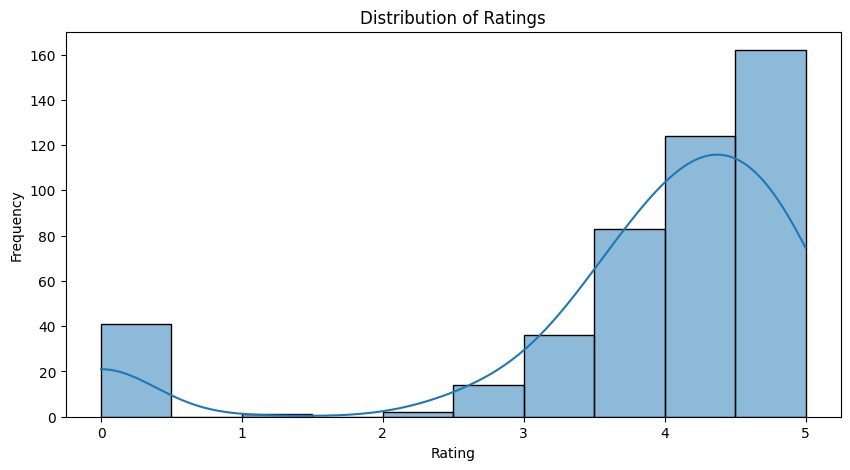

In [9]:
# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.histplot(data=shops, x='rating', bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


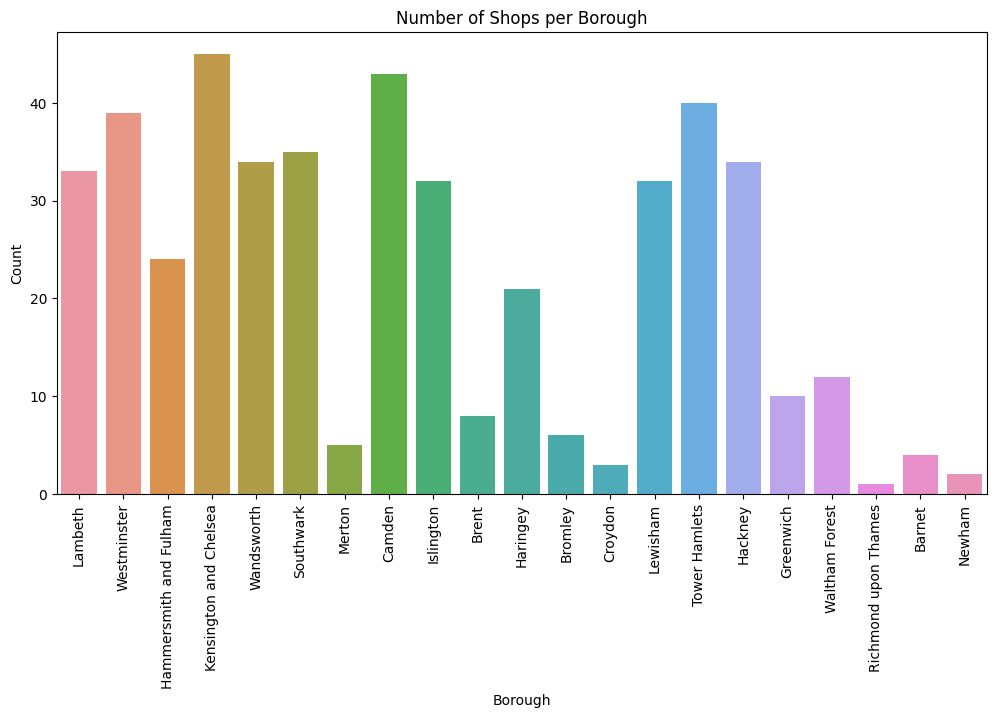

In [10]:
# Number of  shops per borough:
plt.figure(figsize=(12, 6))
sns.countplot(data=shops, x='borough')
plt.title('Number of Shops per Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


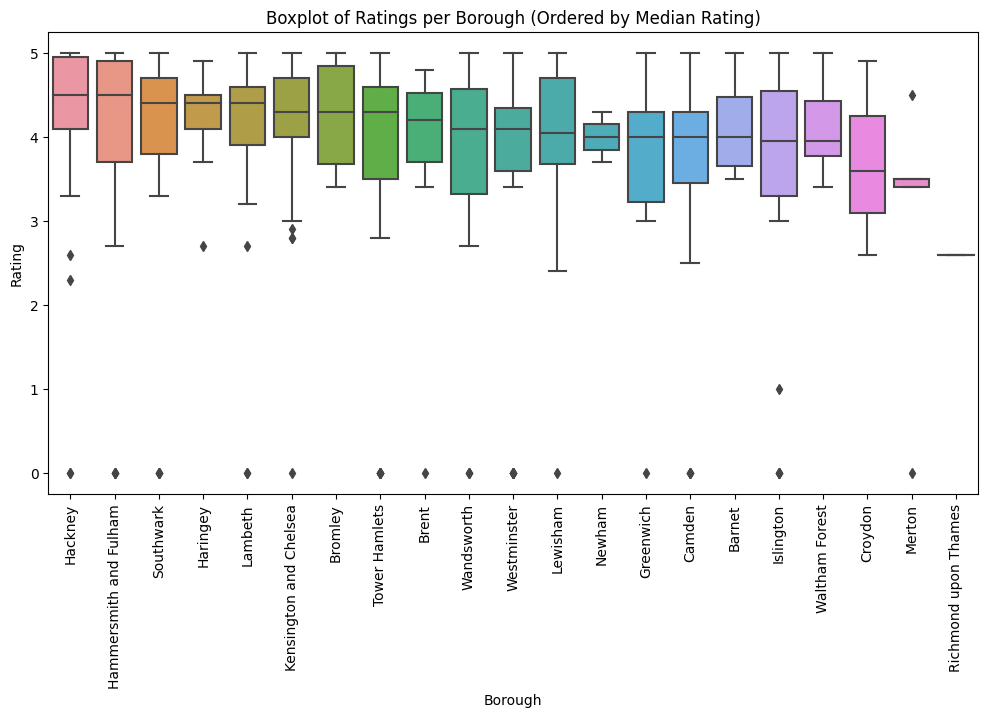

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the median rating for each borough
median_ratings = shops.groupby('borough')['rating'].median().sort_values(ascending=False)

# Create a DataFrame with sorted boroughs based on median ratings
sorted_boroughs = median_ratings.index.tolist()

# Boxplot of ratings per borough, ordered by median rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=shops, x='borough', y='rating', order=sorted_boroughs)
plt.title('Boxplot of Ratings per Borough (Ordered by Median Rating)')
plt.xlabel('Borough')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


In [12]:
missing_values = shops.isnull().sum()
print(missing_values)


name                                                                     0
address                                                                  0
latitude                                                                 0
longitude                                                                0
rating                                                                   0
reviews_count                                                            0
place_id                                                                 0
price_level                                                            389
types                                                                    0
borough                                                                  0
Code                                                                     0
Value                                                                    0
Code_earnings                                                            0
Pay_2021                 

In [13]:
new_variables = ['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', 'Income Rank (where 1 is most deprived)']
shops[new_variables].describe()


,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived)
count,463.000000,463.000000
mean,13219.090001,13064.423612
std,3407.277217,3538.304847
min,7420.611111,8051.083333
25%,10781.378698,10480.911243
50%,11735.375000,11605.471910
75%,16194.968750,16175.703125
max,25694.460870,24133.034783


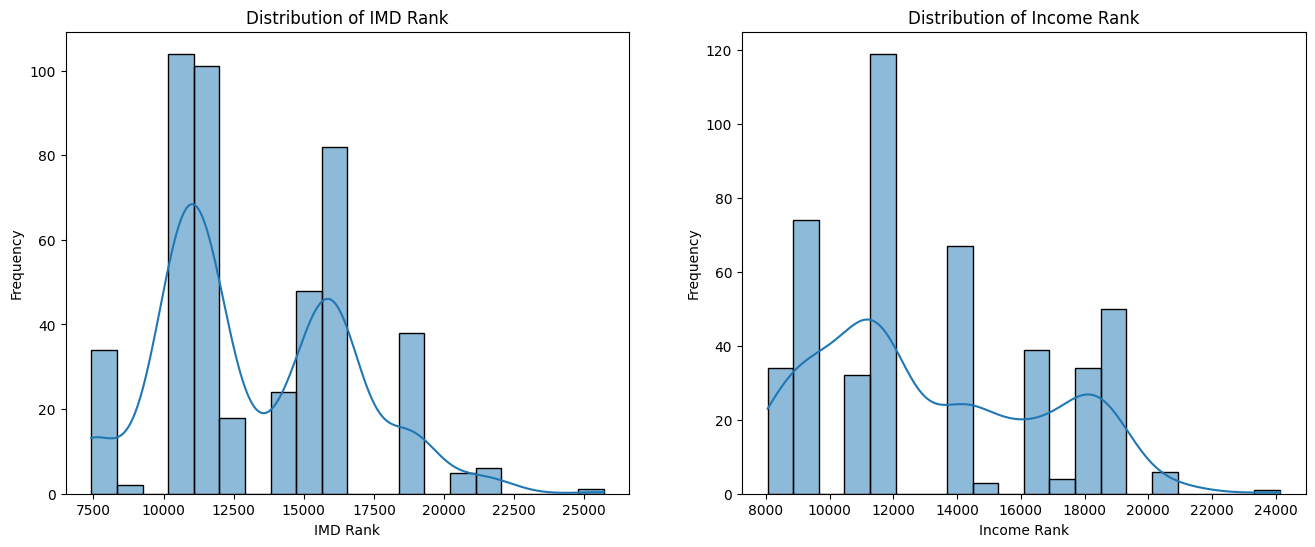

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=shops, x='Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of IMD Rank')
axes[0].set_xlabel('IMD Rank')
axes[0].set_ylabel('Frequency')

sns.histplot(data=shops, x='Income Rank (where 1 is most deprived)', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Income Rank')
axes[1].set_xlabel('Income Rank')
axes[1].set_ylabel('Frequency')

plt.show()


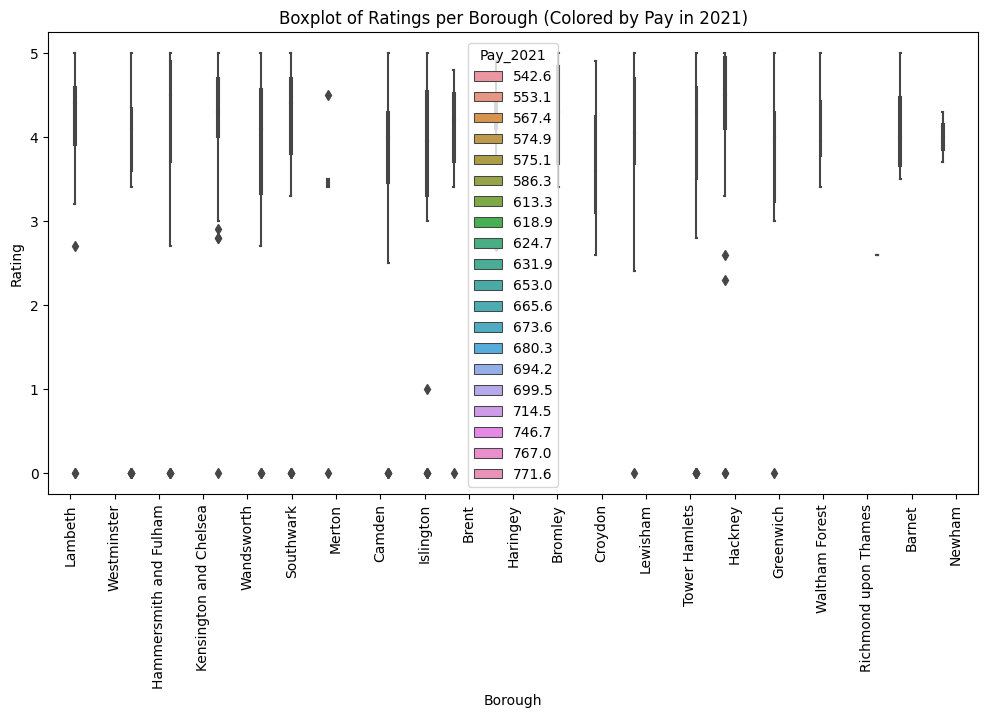

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=shops, x='borough', y='rating', hue='Pay_2021')
plt.title('Boxplot of Ratings per Borough (Colored by Pay in 2021)')
plt.xlabel('Borough')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


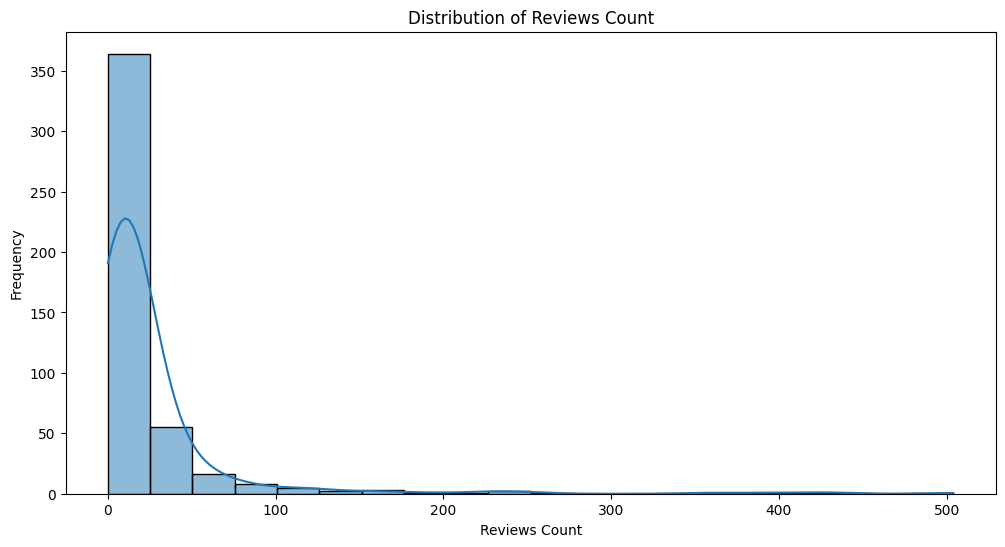

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=shops, x='reviews_count', bins=20, kde=True)
plt.title('Distribution of Reviews Count')
plt.xlabel('Reviews Count')
plt.ylabel('Frequency')
plt.show()


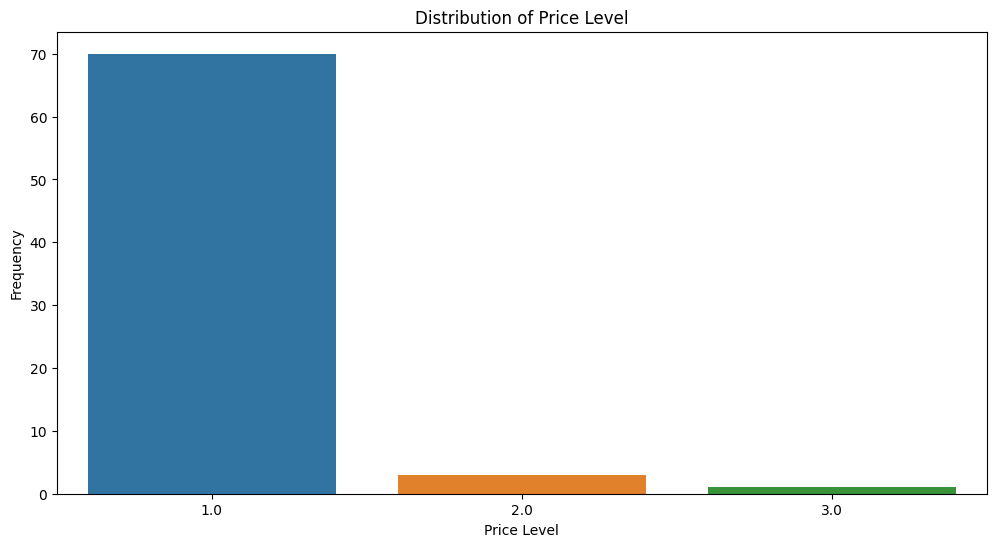

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shops, x='price_level')
plt.title('Distribution of Price Level')
plt.xlabel('Price Level')
plt.ylabel('Frequency')
plt.show()


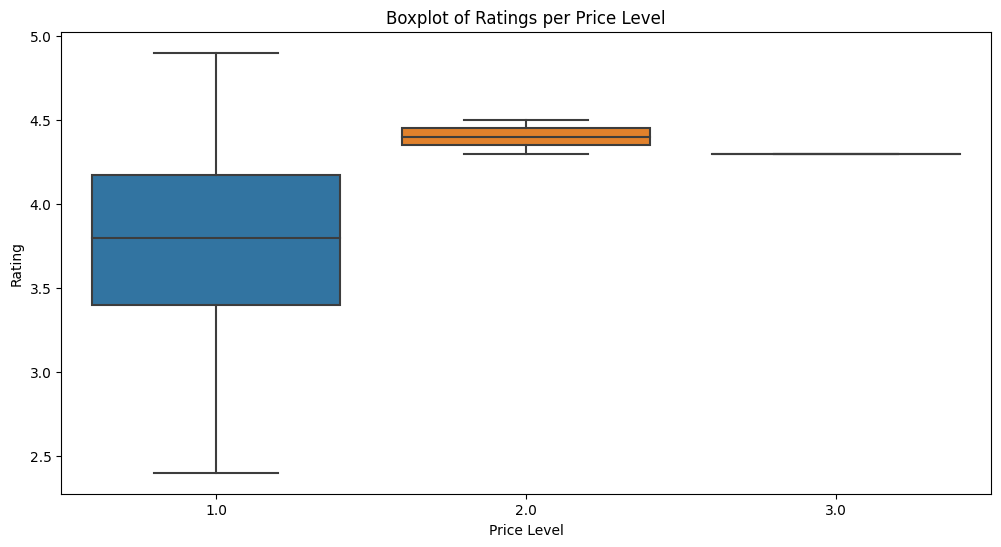

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=shops, x='price_level', y='rating')
plt.title('Boxplot of Ratings per Price Level')
plt.xlabel('Price Level')
plt.ylabel('Rating')
plt.show()



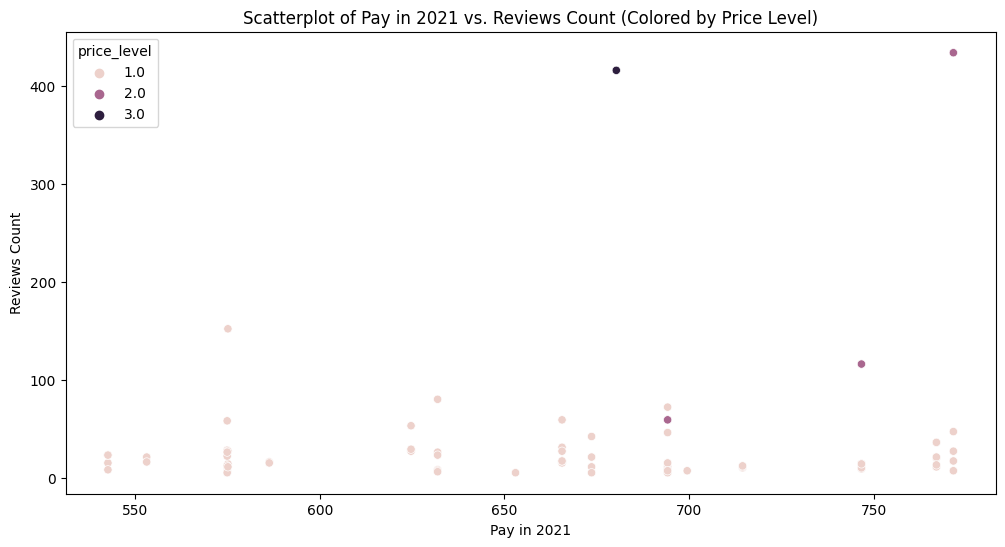

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=shops, x='Pay_2021', y='reviews_count', hue='price_level')
plt.title('Scatterplot of Pay in 2021 vs. Reviews Count (Colored by Price Level)')
plt.xlabel('Pay in 2021')
plt.ylabel('Reviews Count')
plt.show()


In [20]:
# create Boolean mask of missing values
missing_mask = shops.isnull().any(axis=1)

# index the DataFrame using the missing_mask
shops_missing = shops[missing_mask]

display(shops_missing)

# to save time on investigation since there are only 2 shops - just remove them

,name,address,latitude,longitude,rating,reviews_count,place_id,price_level,types,borough,Code,Value,Code_earnings,Pay_2021,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Income Rank (where 1 is most deprived)
0,CIRCA VINTAGE,"87a Lansdowne Way, London",51.474835,-0.128693,4.7,9,ChIJmdDiKHUPdkgR9QrMOgW2vjc,NaN,"jewelry_store, home_goods_store, clothing_stor...",Lambeth,E09000022,"510,000",00AY,673.6,11294.589888,11605.471910
1,Retromania Fara London,"6 Upper Tachbrook St, London",51.493377,-0.139957,4.3,76,ChIJTzZgDuAEdkgR7NUgOuToH4k,NaN,"clothing_store, store, point_of_interest, esta...",Westminster,E09000033,"1,070,000",00BK,771.6,16194.968750,16175.703125
2,Leona,"Brixton Village, Unit 5 Coldharbour Ln, London",51.462156,-0.111480,5.0,4,ChIJ5x9QqWgEdkgRQM3g8mE6ay8,NaN,"clothing_store, store, point_of_interest, esta...",Lambeth,E09000022,"510,000",00AY,673.6,11294.589888,11605.471910
3,ReBelished,"36 Hammersmith Grove, London",51.495415,-0.226249,0.0,0,ChIJ79eAhtQPdkgRO5DhIpyyhhM,NaN,"clothing_store, store, point_of_interest, esta...",Hammersmith and Fulham,E09000013,"740,000",00AN,714.5,14202.601770,13752.920354
4,Chelsea Vintage Couture,"Office - Showroom, BY APPOINTMENT ONLY, Sloane...",51.492457,-0.165966,4.7,45,ChIJhe7IZxoFdkgRb3pI8hrLrlw,NaN,"clothing_store, store, point_of_interest, esta...",Kensington and Chelsea,E09000020,"1,200,000",00AW,767.0,15419.339806,18563.563107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,REMAR,"847 High Rd Leytonstone, London",51.569520,0.012422,5.0,6,ChIJ59CMj2-n2EcRF2jnHUIGIQ0,NaN,"store, health, point_of_interest, establishment",Waltham Forest,E09000031,"430,000",00BH,624.7,11735.375000,11745.701389
458,Haven House Children's Hospice Shop: Leytonstone,"849 High Road, London",51.569737,0.012280,4.8,22,ChIJ4fSpmm-n2EcR22L0FEDSTYk,NaN,"store, point_of_interest, establishment",Waltham Forest,E09000031,"430,000",00BH,624.7,11735.375000,11745.701389
460,Cancer Research UK,"13 The Broadway, London",51.578813,-0.123953,4.7,7,ChIJ8abYTccbdkgRuWlgpSbn4h8,NaN,"clothing_store, home_goods_store, point_of_int...",Haringey,E09000014,"487,500",00AP,542.6,11291.917241,11348.386207
461,Barnardo's,"Greater, 2 Broadway Parade, London",51.579977,-0.123170,4.1,8,ChIJdUsFzsAbdkgR5I9nBFVUidM,NaN,"point_of_interest, store, establishment",Haringey,E09000014,"487,500",00AP,542.6,11291.917241,11348.386207


In [21]:
# remove rows with missing values
# shops = shops.dropna(axis=0)

In [22]:
missing_values = shops.isnull().sum()
print(missing_values)

name                                                                     0
address                                                                  0
latitude                                                                 0
longitude                                                                0
rating                                                                   0
reviews_count                                                            0
place_id                                                                 0
price_level                                                            389
types                                                                    0
borough                                                                  0
Code                                                                     0
Value                                                                    0
Code_earnings                                                            0
Pay_2021                 

In [23]:
column_types = shops.dtypes
print(column_types)


name                                                                    object
address                                                                 object
latitude                                                               float64
longitude                                                              float64
rating                                                                 float64
reviews_count                                                            int64
place_id                                                                object
price_level                                                            float64
types                                                                   object
borough                                                                 object
Code                                                                    object
Value                                                                   object
Code_earnings                                       

In [24]:
import pandas as pd
import re

# Rename long column names
shops = shops.rename(columns={
    'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)': 'IMD_Rank',
    'Income Rank (where 1 is most deprived)': 'Income_Rank'
})

# Define a function to remove non-numeric characters
def remove_non_numeric(value):
    cleaned_value = re.sub('[^0-9.]', '', str(value))
    return cleaned_value if cleaned_value else None

# Apply the function to the 'Value' and 'Pay_2021' columns
shops['Value'] = shops['Value'].apply(remove_non_numeric)
shops['Pay_2021'] = shops['Pay_2021'].apply(remove_non_numeric)

# Drop rows containing None in either 'Value' or 'Pay_2021' columns
shops = shops.dropna(subset=['Value', 'Pay_2021'])

# Convert 'Value' and 'Pay_2021' columns to float
shops['Value'] = shops['Value'].astype(float)
shops['Pay_2021'] = shops['Pay_2021'].astype(float)

# Select relevant columns
selected_columns = shops[['rating', 'Value', 'Pay_2021', 'reviews_count', 'price_level', 'IMD_Rank', 'Income_Rank']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

print(correlation_matrix)


                 rating     Value  Pay_2021  reviews_count  price_level   
rating         1.000000 -0.006213 -0.067329       0.144708     0.219554  \
Value         -0.006213  1.000000  0.798325       0.016075     0.024449   
Pay_2021      -0.067329  0.798325  1.000000       0.014055     0.152839   
reviews_count  0.144708  0.016075  0.014055       1.000000     0.820716   
price_level    0.219554  0.024449  0.152839       0.820716     1.000000   
IMD_Rank      -0.054851  0.469628  0.616046      -0.078234     0.039764   
Income_Rank   -0.009672  0.664802  0.678669      -0.077840    -0.013207   

               IMD_Rank  Income_Rank  
rating        -0.054851    -0.009672  
Value          0.469628     0.664802  
Pay_2021       0.616046     0.678669  
reviews_count -0.078234    -0.077840  
price_level    0.039764    -0.013207  
IMD_Rank       1.000000     0.930929  
Income_Rank    0.930929     1.000000  


- `rating` has a weak positive correlation with `reviews_count` (0.1447) and `price_level` (0.2196), indicating that as ratings increase, the number of reviews and the price level tend to increase as well, but the relationship is weak.
- `Value` (house prices) and `Pay_2021` (earnings) have a strong positive correlation (0.7983), indicating that higher house prices are generally associated with higher earnings in a borough.
- `reviews_count` and price_level have a strong positive correlation (0.8207), suggesting that shops with more reviews tend to have a higher price level.
- `IMD_Rank` and Income_Rank have a strong positive correlation (0.9309), indicating that areas with higher deprivation tend to have lower income levels.

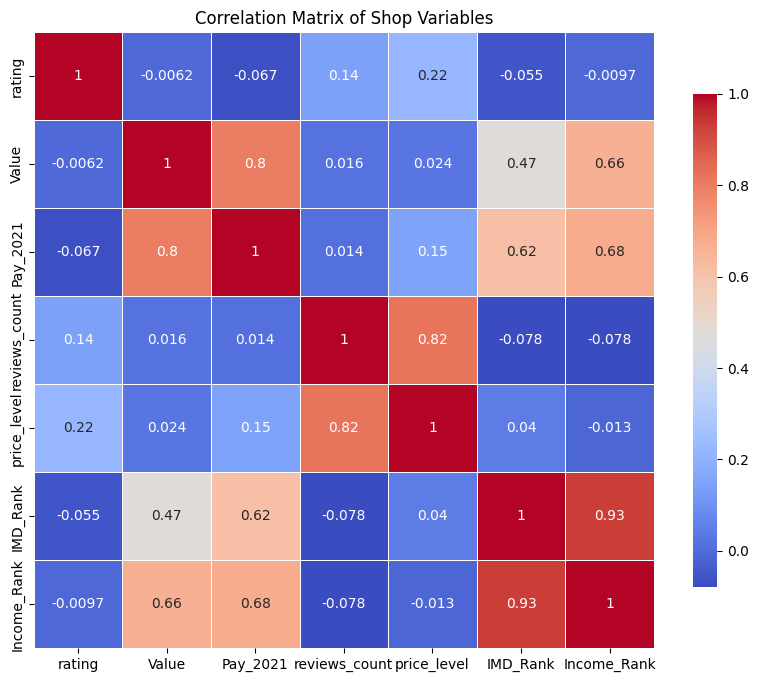

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Shop Variables")
plt.show()


In [26]:
display(selected_columns)

# a rating of 0 in the dataset indicates that the shop has not received any reviews, rather than a genuine 0-star rating
# the rating scale on Google goes from 1 to 5 stars. In other words, there is no option for users to leave a 0-star rating

,rating,Value,Pay_2021,reviews_count,price_level,IMD_Rank,Income_Rank
0,4.7,510000.0,673.6,9,NaN,11294.589888,11605.471910
1,4.3,1070000.0,771.6,76,NaN,16194.968750,16175.703125
2,5.0,510000.0,673.6,4,NaN,11294.589888,11605.471910
3,0.0,740000.0,714.5,0,NaN,14202.601770,13752.920354
4,4.7,1200000.0,767.0,45,NaN,15419.339806,18563.563107
...,...,...,...,...,...,...,...
458,4.8,430000.0,624.7,22,NaN,11735.375000,11745.701389
459,4.3,430000.0,624.7,29,1.0,11735.375000,11745.701389
460,4.7,487500.0,542.6,7,NaN,11291.917241,11348.386207
461,4.1,487500.0,542.6,8,NaN,11291.917241,11348.386207


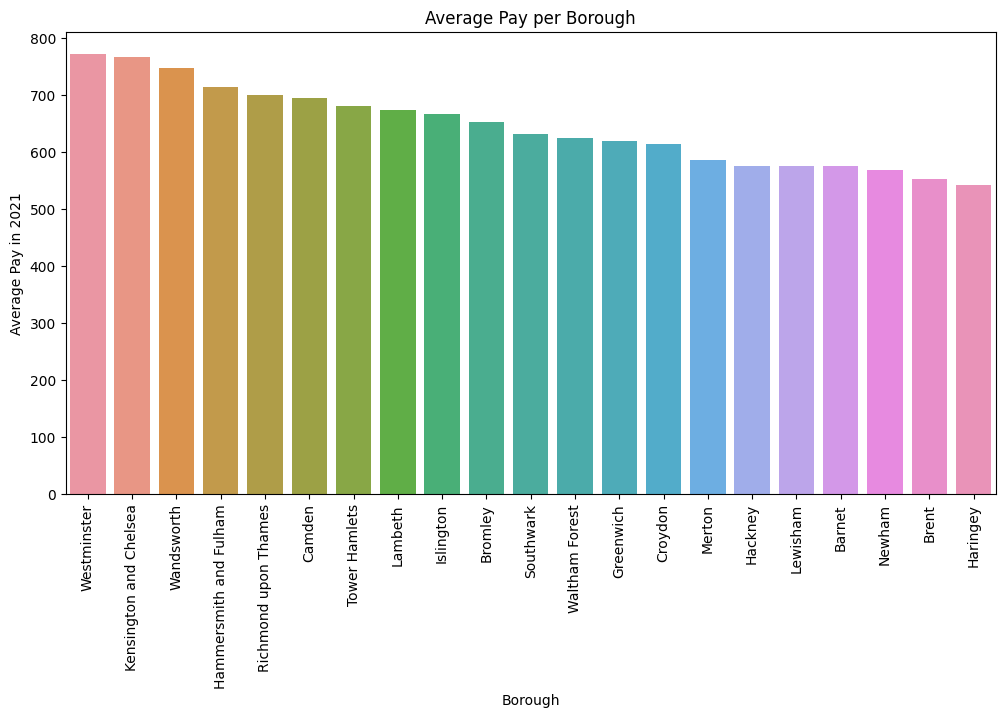

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by borough and calculate the average pay
average_pay_per_borough = shops.groupby('borough')['Pay_2021'].mean().reset_index()

# Sort the DataFrame by average pay in descending order
average_pay_per_borough = average_pay_per_borough.sort_values('Pay_2021', ascending=False)

# Create a bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='borough', y='Pay_2021', data=average_pay_per_borough)
plt.xticks(rotation=90)
plt.title('Average Pay per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Pay in 2021')
plt.show()



In [29]:
# Remove irrelevant and duplicate columns
cleaned_shops = shops.drop(columns=[ 'Code', 'Code_earnings'])

# Rename the columns
cleaned_shops = cleaned_shops.rename(columns={
    'name': 'Shop_Name',
    'address': 'Address',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'rating': 'Rating',
    'place_id': 'Place_ID',
    'borough': 'Borough',
    'Value': 'Property_Value_2017',
    'Pay_2021': 'Earnings_2021',
    'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)': 'IMD_Rank',
    'Income Rank (where 1 is most deprived)': 'Income_Rank',
    'reviews_count': 'Reviews_Count',
    'price_level': 'Price_Level'
})

# Display the cleaned data
display(cleaned_shops)


,Shop_Name,Address,Latitude,Longitude,Rating,Reviews_Count,Place_ID,Price_Level,types,Borough,Property_Value_2017,Earnings_2021,IMD_Rank,Income_Rank
0,CIRCA VINTAGE,"87a Lansdowne Way, London",51.474835,-0.128693,4.7,9,ChIJmdDiKHUPdkgR9QrMOgW2vjc,NaN,"jewelry_store, home_goods_store, clothing_stor...",Lambeth,510000.0,673.6,11294.589888,11605.471910
1,Retromania Fara London,"6 Upper Tachbrook St, London",51.493377,-0.139957,4.3,76,ChIJTzZgDuAEdkgR7NUgOuToH4k,NaN,"clothing_store, store, point_of_interest, esta...",Westminster,1070000.0,771.6,16194.968750,16175.703125
2,Leona,"Brixton Village, Unit 5 Coldharbour Ln, London",51.462156,-0.111480,5.0,4,ChIJ5x9QqWgEdkgRQM3g8mE6ay8,NaN,"clothing_store, store, point_of_interest, esta...",Lambeth,510000.0,673.6,11294.589888,11605.471910
3,ReBelished,"36 Hammersmith Grove, London",51.495415,-0.226249,0.0,0,ChIJ79eAhtQPdkgRO5DhIpyyhhM,NaN,"clothing_store, store, point_of_interest, esta...",Hammersmith and Fulham,740000.0,714.5,14202.601770,13752.920354
4,Chelsea Vintage Couture,"Office - Showroom, BY APPOINTMENT ONLY, Sloane...",51.492457,-0.165966,4.7,45,ChIJhe7IZxoFdkgRb3pI8hrLrlw,NaN,"clothing_store, store, point_of_interest, esta...",Kensington and Chelsea,1200000.0,767.0,15419.339806,18563.563107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Haven House Children's Hospice Shop: Leytonstone,"849 High Road, London",51.569737,0.012280,4.8,22,ChIJ4fSpmm-n2EcR22L0FEDSTYk,NaN,"store, point_of_interest, establishment",Waltham Forest,430000.0,624.7,11735.375000,11745.701389
459,Sue Ryder,"93-95 High St, London",51.582491,-0.029880,4.3,29,ChIJ3XURusYddkgR-kfvsia9vJY,1.0,"point_of_interest, store, establishment",Waltham Forest,430000.0,624.7,11735.375000,11745.701389
460,Cancer Research UK,"13 The Broadway, London",51.578813,-0.123953,4.7,7,ChIJ8abYTccbdkgRuWlgpSbn4h8,NaN,"clothing_store, home_goods_store, point_of_int...",Haringey,487500.0,542.6,11291.917241,11348.386207
461,Barnardo's,"Greater, 2 Broadway Parade, London",51.579977,-0.123170,4.1,8,ChIJdUsFzsAbdkgR5I9nBFVUidM,NaN,"point_of_interest, store, establishment",Haringey,487500.0,542.6,11291.917241,11348.386207


In [30]:
cleaned_shops.to_csv('03_Feature_engineering/cleaned_shops.csv')